## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家
Hints: 隨機產生數值

In [3]:
import pandas as pd
import numpy as np
import random

In [7]:
country = ['中國','比利時','美國','台灣']
people = [random.randint(1,100) for _ in range(4)]
data = {'國家': country,
        '人口(百萬)': people}
data = pd.DataFrame(data)

In [8]:
data

,國家,人口(百萬)
0,中國,72
1,比利時,89
2,美國,9
3,台灣,90


## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [15]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = u'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [16]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [17]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\t'

data = data.split(split_tag)
print(len(data))
data[5]

9996


'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg\nn00015388_373'

## 將 txt 轉成 pandas dataframe

In [23]:
import pandas as pd
pic_name = [data[i] for i in range(len(data)) if i%2 == 0]
pic_url = [data[i] for i in range(len(data)) if i%2 != 0]    
arrange_data = {
    '圖片名稱':pic_name,
    '圖片網址':pic_url
}

df = pd.DataFrame(arrange_data)
df.head()

,圖片名稱,圖片網址
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...,http://farm1.static.flickr.com/27/51009336_a96...
2,http://farm4.static.flickr.com/3025/2444687979...,http://img100.imageshack.us/img100/3253/forres...
3,http://img172.imageshack.us/img172/4606/napo03...,http://fotootjesvanannelies.web-log.nl/olifant...
4,http://www.deweekkrant.nl/images/library/pictu...,http://www.porschemania.it/discus/messages/815...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

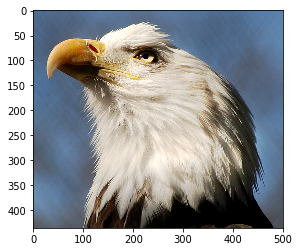

In [25]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, '圖片網址']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [28]:
df[0:5]['圖片網址'].values

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg\nn00015388_327',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg\nn00015388_373',
       'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg\nn00015388_388',
       'http://www.porschemania.it/discus/messages/815/102099.jpg\nn00015388_474'],
      dtype=object)

In [48]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    
    for i in url_list:
        try:
            response = requests.get(i)
            img_list.append(Image.open(BytesIO(response.content)))
        except:
            pass
        
    return img_list

Total images that we got: 2 


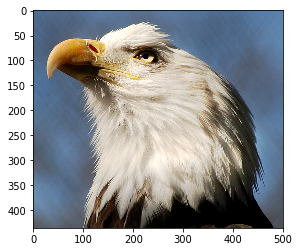

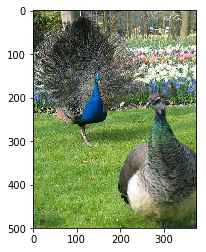

In [49]:
result = img2arr_fromURLs(df[0:5]['圖片網址'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

In [51]:
for i in df[0:5]['圖片網址'].values:
    print(i)

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
n00015388_327
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
n00015388_373
http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
n00015388_388
http://www.porschemania.it/discus/messages/815/102099.jpg
n00015388_474


In [52]:
df[0:5]['圖片網址'].values

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg\nn00015388_327',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg\nn00015388_373',
       'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg\nn00015388_388',
       'http://www.porschemania.it/discus/messages/815/102099.jpg\nn00015388_474'],
      dtype=object)